# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [ ]:
# transform = transforms.Compose([
#                     transforms.ToTensor(), 
#             ])

# trainset = datasets.MNIST(root='', train=True, download=True, transform=None)
# testset = datasets.MNIST(root='./', train=False, download=True, transform=None)

In [ ]:
ROOT = './data'

train_transforms = transforms.Compose([
                    transforms.ToTensor(), 
                  ])

test_transforms = transforms.Compose([
                    transforms.ToTensor(), 
                  ])

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
def plot_images(images):
  n_images = len(images)

  rows = int(np.sqrt(n_images))
  cols = int(np.sqrt(n_images))

  fig = plt.figure()
  for i in range(rows*cols):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
    ax.axis('off')

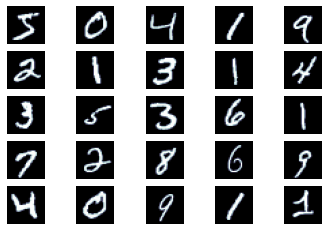

In [ ]:
N_IMAGES = 25
images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]
plot_images(images)

In [ ]:
VALID_RATIO = 0.8

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [ ]:
import torch.utils.data as data
train_data, valid_data = data.random_split(train_data, [n_train_examples, n_valid_examples])

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 48000
Number of validation examples: 12000
Number of testing examples: 10000


In [ ]:
# trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
#                                                     , shuffle=True, num_workers=2)
# trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
#                                                      , shuffle=True, num_workers=2)
# # testloader = #TODO

Next, we'll define a DataLoader for each of the training/validation/test sets. We can iterate over these, and they will yield batches of images and labels which we can use to train our model.

We only need to shuffle our training set as it will be used for stochastic gradient descent, and we want each batch to be different between epochs. As we aren't using the validation or test sets to update our model parameters, they do not need to be shuffled.

Ideally, we want to use the biggest batch size that we can. The 64 here is relatively small and can be increased if our hardware can handle it.

In [ ]:
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE,
                                num_workers=2)

In [ ]:
# from tqdm import tqdm

# pbar = tqdm(total=len(trainloader_minibatch))
# for idx, (data,label) in enumerate(trainloader_minibatch):
#     print(idx,data.size(),label.size())
#     pbar.update(1)
#     break
# pbar.refresh()

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [ ]:
# class SimpleMLP(nn.Module):
#     def __init__(self):
#         super(SimpleMLP,self).__init__()
#         # code here
#     def forward(self,x):
#         # code here
#         return output

In [ ]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):

        # x = [batch size, height, width]

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        # x = [batch size, height * width]

        h_1 = F.relu(self.input_fc(x))

        # h_1 = [batch size, 250]

        h_2 = F.relu(self.hidden_fc(h_1))

        # h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]

        return y_pred, h_2

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model = MLP(INPUT_DIM, OUTPUT_DIM)

In [ ]:
model

MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 222,360 trainable parameters


### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [ ]:
# import torch.optim as optim

# optimizer_adam = optim.Adam(model.parameters())
# optimizer_adam

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
from tqdm.notebook import trange, tqdm

def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator), 

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [ ]:
from sklearn import metrics

def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

# plot_confusion_matrix(labels, pred_labels)

In [ ]:
# code here 
learning_rate = 0.01

SGD_optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
SGD_momentum_optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)
SGD_L2_optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 1e-7)
optimizer_RMSprop = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.50)
ADAM_optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
optimizers = [SGD_optimizer, SGD_momentum_optimizer, SGD_L2_optimizer, optimizer_RMSprop, ADAM_optimizer]
optim_names = ["SGD", "SGD_with_momentum", "SGD_with_L2_regularization", "RMSprop", "Adam"]

In [ ]:
EPOCHS = 15

*************************************************************************************
SGD


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 14s
	Train Loss: 1.891 | Train Acc: 55.70%
	 Val. Loss: 1.038 |  Val. Acc: 78.17%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 14s
	Train Loss: 0.665 | Train Acc: 83.64%
	 Val. Loss: 0.485 |  Val. Acc: 87.29%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 15s
	Train Loss: 0.429 | Train Acc: 88.29%
	 Val. Loss: 0.389 |  Val. Acc: 89.14%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 15s
	Train Loss: 0.366 | Train Acc: 89.66%
	 Val. Loss: 0.349 |  Val. Acc: 90.01%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 15s
	Train Loss: 0.332 | Train Acc: 90.53%
	 Val. Loss: 0.321 |  Val. Acc: 91.06%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 18s
	Train Loss: 0.309 | Train Acc: 91.01%
	 Val. Loss: 0.303 |  Val. Acc: 91.43%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 15s
	Train Loss: 0.291 | Train Acc: 91.66%
	 Val. Loss: 0.288 |  Val. Acc: 91.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 14s
	Train Loss: 0.275 | Train Acc: 92.07%
	 Val. Loss: 0.276 |  Val. Acc: 92.24%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 15s
	Train Loss: 0.261 | Train Acc: 92.43%
	 Val. Loss: 0.264 |  Val. Acc: 92.60%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 14s
	Train Loss: 0.249 | Train Acc: 92.75%
	 Val. Loss: 0.254 |  Val. Acc: 92.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 15s
	Train Loss: 0.237 | Train Acc: 93.13%
	 Val. Loss: 0.242 |  Val. Acc: 93.11%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 15s
	Train Loss: 0.225 | Train Acc: 93.50%
	 Val. Loss: 0.235 |  Val. Acc: 93.48%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 15s
	Train Loss: 0.216 | Train Acc: 93.81%
	 Val. Loss: 0.224 |  Val. Acc: 93.78%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 14s
	Train Loss: 0.205 | Train Acc: 94.13%
	 Val. Loss: 0.215 |  Val. Acc: 93.93%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 14s
	Train Loss: 0.197 | Train Acc: 94.43%
	 Val. Loss: 0.208 |  Val. Acc: 94.07%
Mean Train Loss: 0.410 | Mean Train Acc: 89.12%
Mean Val. Loss: 0.339 |  Mean Val. Acc: 91.01%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.193 | Test Acc: 94.34%
Precision: 0.944
Recall: 0.943
Accuracy: 0.943
F1 Score: 0.943
*************************************************************************************
SGD_with_momentum


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 15s
	Train Loss: 0.186 | Train Acc: 94.60%
	 Val. Loss: 0.167 |  Val. Acc: 95.25%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 15s
	Train Loss: 0.136 | Train Acc: 95.95%
	 Val. Loss: 0.134 |  Val. Acc: 96.31%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 15s
	Train Loss: 0.105 | Train Acc: 96.91%
	 Val. Loss: 0.128 |  Val. Acc: 96.22%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 15s
	Train Loss: 0.083 | Train Acc: 97.52%
	 Val. Loss: 0.104 |  Val. Acc: 96.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 15s
	Train Loss: 0.068 | Train Acc: 97.90%
	 Val. Loss: 0.093 |  Val. Acc: 97.40%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 15s
	Train Loss: 0.057 | Train Acc: 98.31%
	 Val. Loss: 0.089 |  Val. Acc: 97.42%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 15s
	Train Loss: 0.048 | Train Acc: 98.55%
	 Val. Loss: 0.088 |  Val. Acc: 97.36%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 15s
	Train Loss: 0.039 | Train Acc: 98.85%
	 Val. Loss: 0.084 |  Val. Acc: 97.67%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 15s
	Train Loss: 0.033 | Train Acc: 99.08%
	 Val. Loss: 0.092 |  Val. Acc: 97.43%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 15s
	Train Loss: 0.028 | Train Acc: 99.21%
	 Val. Loss: 0.082 |  Val. Acc: 97.69%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 15s
	Train Loss: 0.023 | Train Acc: 99.41%
	 Val. Loss: 0.110 |  Val. Acc: 97.07%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 15s
	Train Loss: 0.019 | Train Acc: 99.52%
	 Val. Loss: 0.088 |  Val. Acc: 97.51%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 15s
	Train Loss: 0.015 | Train Acc: 99.67%
	 Val. Loss: 0.078 |  Val. Acc: 97.86%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 15s
	Train Loss: 0.012 | Train Acc: 99.77%
	 Val. Loss: 0.081 |  Val. Acc: 97.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 16s
	Train Loss: 0.010 | Train Acc: 99.81%
	 Val. Loss: 0.090 |  Val. Acc: 97.59%
Mean Train Loss: 0.057 | Mean Train Acc: 98.34%
Mean Val. Loss: 0.101 |  Mean Val. Acc: 97.17%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.068 | Test Acc: 97.87%
Precision: 0.979
Recall: 0.979
Accuracy: 0.979
F1 Score: 0.979
*************************************************************************************
SGD_with_L2_regularization


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.009 | Train Acc: 99.88%
	 Val. Loss: 0.073 |  Val. Acc: 97.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 15s
	Train Loss: 0.008 | Train Acc: 99.91%
	 Val. Loss: 0.075 |  Val. Acc: 97.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 15s
	Train Loss: 0.008 | Train Acc: 99.92%
	 Val. Loss: 0.075 |  Val. Acc: 97.94%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.007 | Train Acc: 99.92%
	 Val. Loss: 0.075 |  Val. Acc: 97.91%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 15s
	Train Loss: 0.007 | Train Acc: 99.93%
	 Val. Loss: 0.075 |  Val. Acc: 97.94%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 15s
	Train Loss: 0.007 | Train Acc: 99.94%
	 Val. Loss: 0.076 |  Val. Acc: 98.01%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 15s
	Train Loss: 0.007 | Train Acc: 99.93%
	 Val. Loss: 0.076 |  Val. Acc: 97.91%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 15s
	Train Loss: 0.007 | Train Acc: 99.94%
	 Val. Loss: 0.076 |  Val. Acc: 97.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 15s
	Train Loss: 0.006 | Train Acc: 99.93%
	 Val. Loss: 0.076 |  Val. Acc: 97.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 16s
	Train Loss: 0.006 | Train Acc: 99.94%
	 Val. Loss: 0.077 |  Val. Acc: 97.93%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 15s
	Train Loss: 0.006 | Train Acc: 99.94%
	 Val. Loss: 0.076 |  Val. Acc: 97.95%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 15s
	Train Loss: 0.006 | Train Acc: 99.94%
	 Val. Loss: 0.077 |  Val. Acc: 97.94%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 16s
	Train Loss: 0.006 | Train Acc: 99.95%
	 Val. Loss: 0.076 |  Val. Acc: 97.89%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 16s
	Train Loss: 0.006 | Train Acc: 99.95%
	 Val. Loss: 0.077 |  Val. Acc: 97.95%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 16s
	Train Loss: 0.006 | Train Acc: 99.95%
	 Val. Loss: 0.077 |  Val. Acc: 97.93%
Mean Train Loss: 0.007 | Mean Train Acc: 99.93%
Mean Val. Loss: 0.076 |  Mean Val. Acc: 97.94%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.066 | Test Acc: 98.01%
Precision: 0.980
Recall: 0.980
Accuracy: 0.980
F1 Score: 0.980
*************************************************************************************
RMSprop


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.472 | Train Acc: 91.44%
	 Val. Loss: 0.336 |  Val. Acc: 94.49%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.417 | Train Acc: 94.19%
	 Val. Loss: 0.361 |  Val. Acc: 95.18%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 18s
	Train Loss: 0.434 | Train Acc: 94.65%
	 Val. Loss: 0.523 |  Val. Acc: 94.24%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 0.455 | Train Acc: 94.70%
	 Val. Loss: 0.644 |  Val. Acc: 93.84%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.485 | Train Acc: 94.43%
	 Val. Loss: 1.377 |  Val. Acc: 91.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 18s
	Train Loss: 0.569 | Train Acc: 94.73%
	 Val. Loss: 0.717 |  Val. Acc: 94.00%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.615 | Train Acc: 93.90%
	 Val. Loss: 0.672 |  Val. Acc: 93.12%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 19s
	Train Loss: 0.645 | Train Acc: 93.59%
	 Val. Loss: 0.859 |  Val. Acc: 93.29%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.695 | Train Acc: 93.10%
	 Val. Loss: 0.939 |  Val. Acc: 91.45%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 18s
	Train Loss: 0.675 | Train Acc: 93.12%
	 Val. Loss: 2.497 |  Val. Acc: 89.89%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 19s
	Train Loss: 0.744 | Train Acc: 92.86%
	 Val. Loss: 1.346 |  Val. Acc: 93.63%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.730 | Train Acc: 92.90%
	 Val. Loss: 1.463 |  Val. Acc: 91.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 18s
	Train Loss: 0.772 | Train Acc: 92.34%
	 Val. Loss: 1.362 |  Val. Acc: 90.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 19s
	Train Loss: 0.746 | Train Acc: 91.84%
	 Val. Loss: 2.441 |  Val. Acc: 94.39%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.818 | Train Acc: 92.26%
	 Val. Loss: 1.881 |  Val. Acc: 91.81%
Mean Train Loss: 0.618 | Mean Train Acc: 93.34%
Mean Val. Loss: 1.161 |  Mean Val. Acc: 92.89%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.323 | Test Acc: 94.63%
Precision: 0.948
Recall: 0.946
Accuracy: 0.946
F1 Score: 0.946
*************************************************************************************
Adam


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 18s
	Train Loss: 0.227 | Train Acc: 94.22%
	 Val. Loss: 0.163 |  Val. Acc: 95.74%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.142 | Train Acc: 96.08%
	 Val. Loss: 0.149 |  Val. Acc: 96.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 19s
	Train Loss: 0.108 | Train Acc: 96.97%
	 Val. Loss: 0.143 |  Val. Acc: 96.48%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.101 | Train Acc: 97.26%
	 Val. Loss: 0.124 |  Val. Acc: 96.91%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.096 | Train Acc: 97.44%
	 Val. Loss: 0.170 |  Val. Acc: 95.91%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 22s
	Train Loss: 0.092 | Train Acc: 97.57%
	 Val. Loss: 0.133 |  Val. Acc: 96.84%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 0.078 | Train Acc: 97.94%
	 Val. Loss: 0.122 |  Val. Acc: 96.97%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.076 | Train Acc: 98.00%
	 Val. Loss: 0.158 |  Val. Acc: 96.50%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 19s
	Train Loss: 0.070 | Train Acc: 98.19%
	 Val. Loss: 0.146 |  Val. Acc: 96.88%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 18s
	Train Loss: 0.067 | Train Acc: 98.19%
	 Val. Loss: 0.162 |  Val. Acc: 96.88%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 19s
	Train Loss: 0.069 | Train Acc: 98.28%
	 Val. Loss: 0.135 |  Val. Acc: 97.20%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.063 | Train Acc: 98.41%
	 Val. Loss: 0.188 |  Val. Acc: 96.87%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 19s
	Train Loss: 0.064 | Train Acc: 98.40%
	 Val. Loss: 0.162 |  Val. Acc: 97.13%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 19s
	Train Loss: 0.064 | Train Acc: 98.45%
	 Val. Loss: 0.152 |  Val. Acc: 97.27%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.069 | Train Acc: 98.39%
	 Val. Loss: 0.155 |  Val. Acc: 97.17%
Mean Train Loss: 0.092 | Mean Train Acc: 97.59%
Mean Val. Loss: 0.151 |  Mean Val. Acc: 96.73%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.137 | Test Acc: 97.07%
Precision: 0.971
Recall: 0.971
Accuracy: 0.971
F1 Score: 0.971


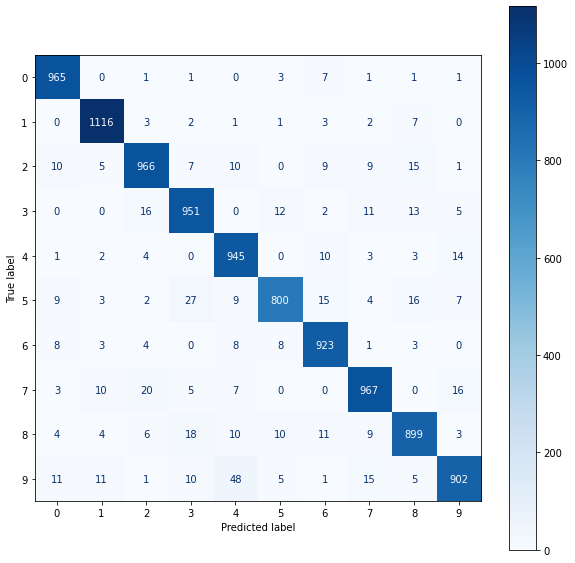

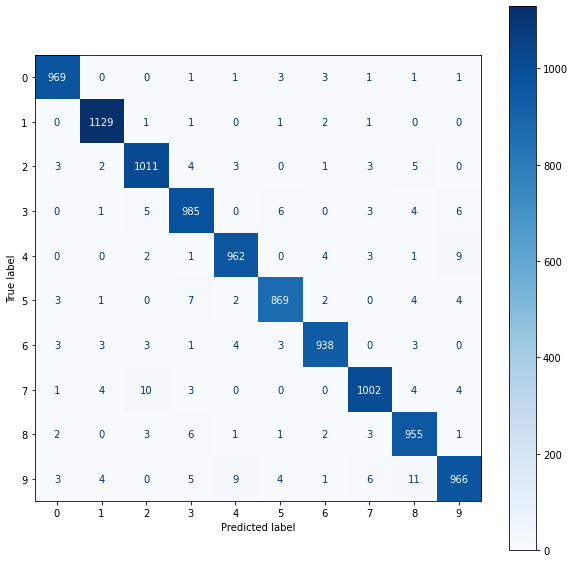

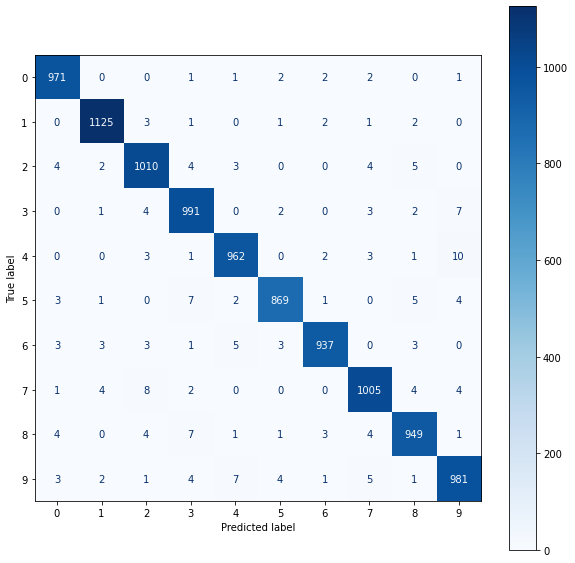

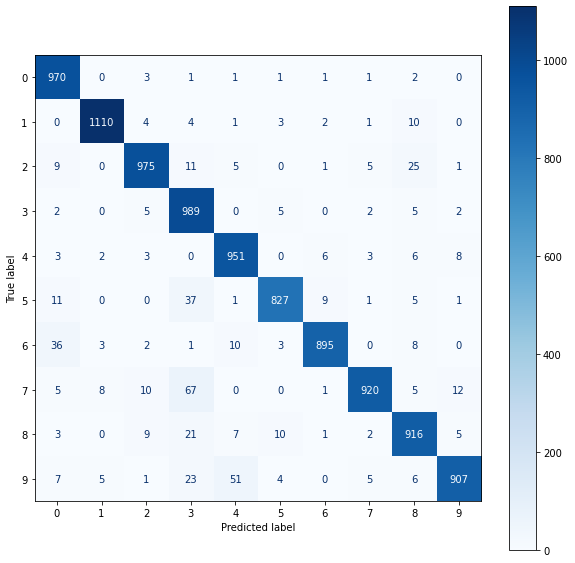

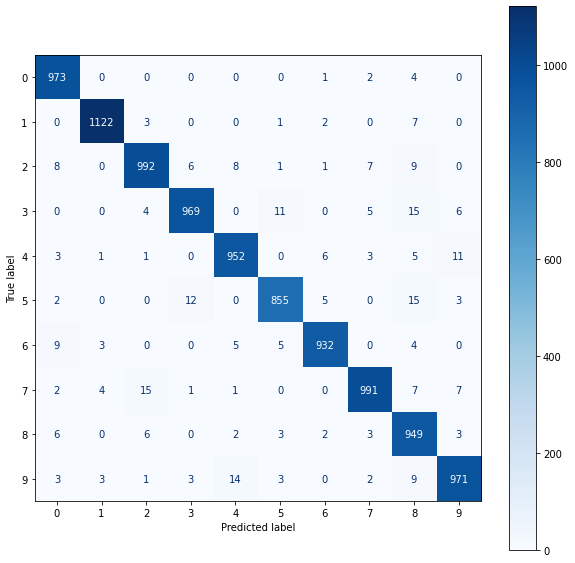

In [ ]:
train_losses_list = []
train_accuracy_list = []
test_losses_list = []
test_accuracy_list = []
test_f1_scores_list = []
test_precision_list = []
test_recall_list = []
test_accuracy_list = []

import time
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for index, optimizer in enumerate(optimizers):
    print("*************************************************************************************")
    
    print(optim_names[index])
    EPOCHS = 15

    best_valid_loss = float('inf')

    tot_train_loss = 0.0
    tot_train_acc = 0.0
    tot_valid_loss = 0.0
    tot_valid_acc = 0.0

    train_loss_epocwise = []
    train_accuracy_epocwise = []
    test_loss_epocwise = []
    test_accuracy_epocwise = []

    for epoch in trange(EPOCHS):

        start_time = time.monotonic()

        train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

        train_loss_epocwise.append(train_loss)
        train_accuracy_epocwise.append(train_acc)
        test_loss_epocwise.append(valid_loss)
        test_accuracy_epocwise.append(valid_acc)

        tot_train_loss += train_loss
        tot_train_acc += train_acc
        tot_valid_loss += valid_loss
        tot_valid_acc += valid_acc

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), "model_" + optim_names[index] + ".pt")

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    mean_train_loss = tot_train_loss/EPOCHS
    mean_train_acc = tot_train_acc/EPOCHS
    mean_valid_loss = tot_valid_loss/EPOCHS
    mean_valid_acc = tot_valid_acc/EPOCHS
    print(f'Mean Train Loss: {mean_train_loss:.3f} | Mean Train Acc: {mean_train_acc*100:.2f}%')
    print(f'Mean Val. Loss: {mean_valid_loss:.3f} |  Mean Val. Acc: {mean_valid_acc*100:.2f}%')

    model.load_state_dict(torch.load("model_" + optim_names[index] + ".pt"))
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

    images, labels, probs = get_predictions(model, test_iterator, device)
    pred_labels = torch.argmax(probs, 1)

    print('Precision: %.3f' % precision_score(labels, pred_labels, average='weighted'))
    print('Recall: %.3f' % recall_score(labels, pred_labels, average='weighted'))
    print('Accuracy: %.3f' % accuracy_score(labels, pred_labels))
    print('F1 Score: %.3f' % f1_score(labels, pred_labels, average='weighted'))

    train_losses_list.append(train_loss_epocwise)
    train_accuracy_list.append(train_accuracy_epocwise)
    test_losses_list.append(test_loss_epocwise)
    test_accuracy_list.append(test_accuracy_epocwise)
    test_f1_scores_list.append(f1_score(labels, pred_labels, average='weighted'))
    test_precision_list.append(precision_score(labels, pred_labels, average='weighted'))
    test_recall_list.append(recall_score(labels, pred_labels, average='weighted'))
    test_accuracy_list.append(accuracy_score(labels, pred_labels))
    plot_confusion_matrix(labels, pred_labels)
    print("======================================================================================")

In [ ]:
print(train_losses_list)
print(train_accuracy_list)
print(test_losses_list)
print(test_accuracy_list)
print(test_f1_scores_list)
print(test_precision_list)
print(test_recall_list)
print(test_accuracy_list)

[[1.8912817543347678, 0.6649706354935964, 0.4286665057142576, 0.36561206918954847, 0.332383808473746, 0.3094950669109821, 0.29120638957619666, 0.27536503885189695, 0.2610903801421324, 0.24858786314725875, 0.23685200008749963, 0.22546124658485253, 0.2155579967101415, 0.20545812466243904, 0.19667323213815688], [0.1859360540062189, 0.13601312035073837, 0.1050202304571867, 0.0834252724510928, 0.06824619031449158, 0.05675096833504115, 0.04763625772545735, 0.03931649433666219, 0.03283027649422487, 0.02817956785640369, 0.022582242426540083, 0.018892102654092014, 0.0148953658255438, 0.011912101420651501, 0.010004369565052912], [0.008870652700580347, 0.00794677503569983, 0.007585668576648458, 0.007323238566129779, 0.00708990023820661, 0.0069296476176629465, 0.00676476113894023, 0.0065812601544894276, 0.006479594121221453, 0.006348446821017812, 0.0062173019653225005, 0.00609026454835354, 0.005990219741749267, 0.0058718676287292815, 0.0057608348766807465], [0.4722358018793166, 0.41726850341943406

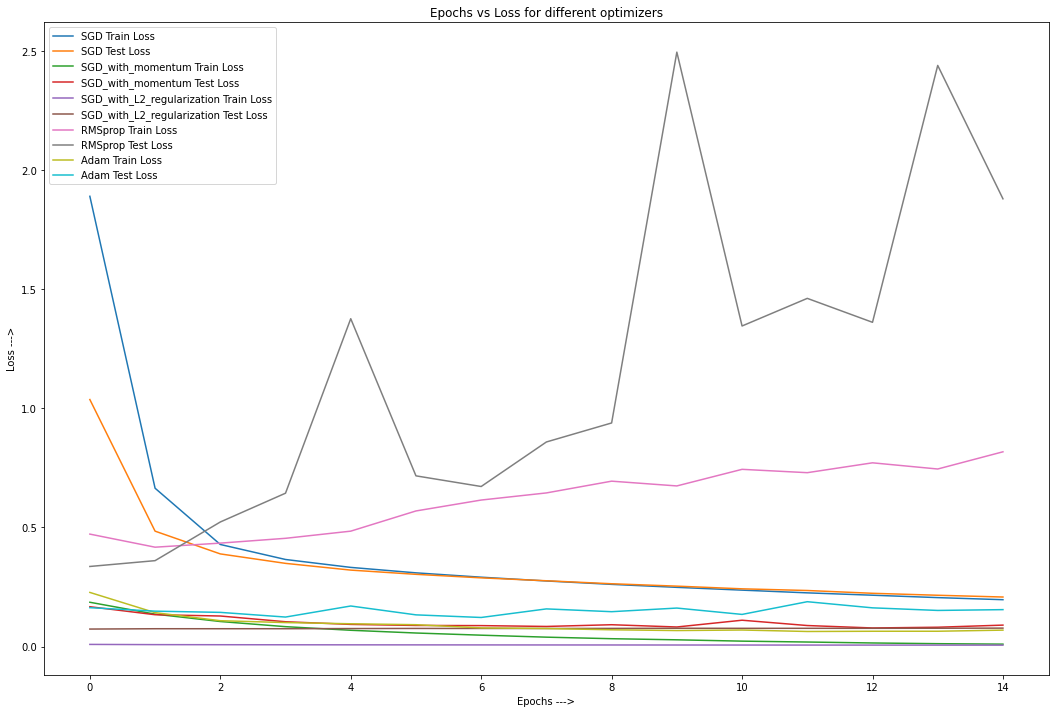

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Loss for different optimizers")
for i in range(len(optimizers)):
    plt.plot(train_losses_list[i], label=optim_names[i] + " Train Loss")
    plt.plot(test_losses_list[i], label=optim_names[i] + " Test Loss")
plt.xlabel("Epochs --->")
plt.ylabel("Loss --->")
plt.legend()
plt.show()

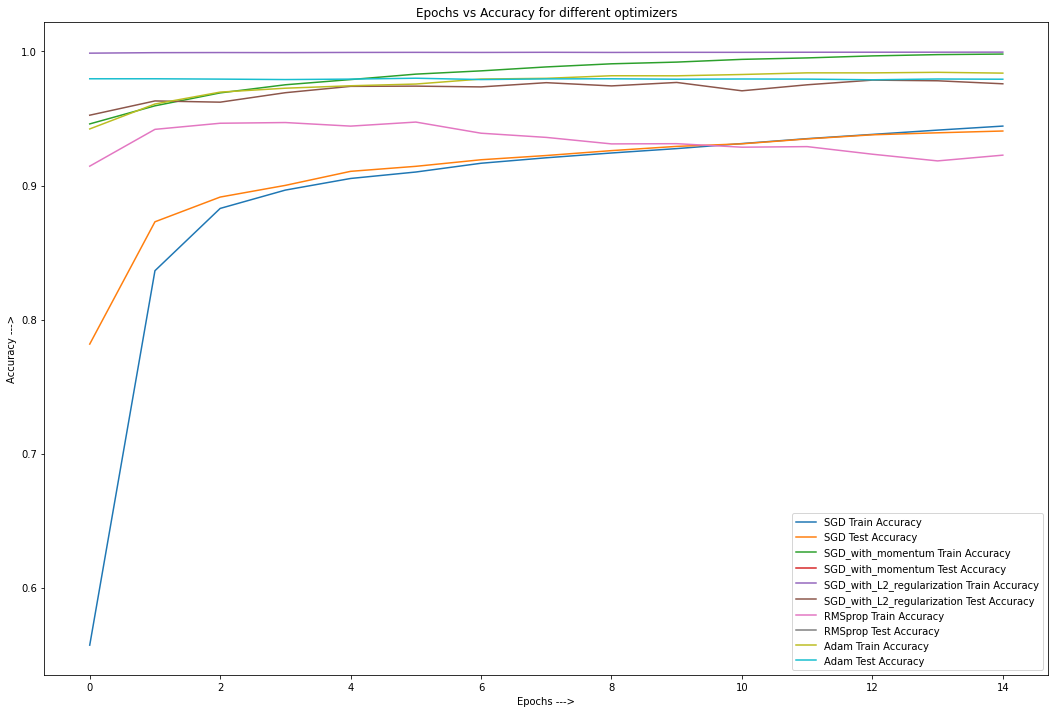

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Accuracy for different optimizers")
for i in range(len(optimizers)):
    plt.plot(train_accuracy_list[i], label=optim_names[i] + " Train Accuracy")
    plt.plot(test_accuracy_list[i], label=optim_names[i] + " Test Accuracy")
plt.xlabel("Epochs --->")
plt.ylabel("Accuracy --->")
plt.legend()
plt.show()

**Observation**<br>
- SGD takes highest time to converge and hence requires more epochs to converge gradually.
- But, if we add momentum with SGD or L2 regularization with SGD then it performs very well for this dataset.
- SGD with L2 regularization performs very accurate with test dataset since it penalizes large weights and prevents overfitting.
- The best test accuracy is given by SGD with L2 regularization
- Adam and RMSprop are advanced optimizers.
- However, RMSprop is not performing well in this very dataset.
- Adam is performing slightly better than RMSprop in this dataset.
- Adam optimizer is just next to SGD(momentum) and SGD(L2 regularization) in terms of performance.

In [ ]:
# code here

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [ ]:
# code, plots and explainiation here

In [ ]:
# # sample code: need not rely on this
# EPOCHS = 25

# train_loss = []
# val_loss = []

# mlp.train()

# for epoch in range(EPOCHS):
#     pbar = tqdm(total=len(trainloader))
#     out_loss = 0
#     for batch_idx, (data, target) in enumerate(trainloader):
#         # do things
        
#         if torch.cuda.is_available():
#             data,target = data.cuda(),target.cuda()
        
#         out = mlp(data)
#         # do things
#         out_loss += loss.cpu().data.item()
#         # do things
#         pbar.update(1)
#         pbar.desc= f'Loss: {loss.item()}'
#     train_loss.append(out_loss/len(trainloader))
#     with torch.no_grad():
#         out_loss = 0
#         for batch_idx, (data, target) in enumerate(testloader):
#             # do things
            
#         val_loss.append(out_loss/len(testloader))
#     print()
#     pbar.refresh()
#     pbar.close()

# plot_losses(train_loss,val_loss)
# final_metrics = get_metrics_somehow(mlp,trainloader,testloader)

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

In [ ]:
def train_and_validate_for_scheduler(model, optimizer, scheduler=None):
    train_losses_list = []
    train_accuracy_list = []
    test_losses_list = []
    test_accuracy_list = []
    test_f1_scores_list = []
    test_precision_list = []
    test_recall_list = []
    test_accuracy_list = []

    import time
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    EPOCHS = 15

    best_valid_loss = float('inf')

    tot_train_loss = 0.0
    tot_train_acc = 0.0
    tot_valid_loss = 0.0
    tot_valid_acc = 0.0

    train_loss_epocwise = []
    train_accuracy_epocwise = []
    test_loss_epocwise = []
    test_accuracy_epocwise = []

    print("======================================================================================")
    print(model)

    for epoch in trange(EPOCHS):

        start_time = time.monotonic()

        train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

        train_loss_epocwise.append(train_loss)
        train_accuracy_epocwise.append(train_acc)
        test_loss_epocwise.append(valid_loss)
        test_accuracy_epocwise.append(valid_acc)

        tot_train_loss += train_loss
        tot_train_acc += train_acc
        tot_valid_loss += valid_loss
        tot_valid_acc += valid_acc

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), "model_scheduler.pt")

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

        if scheduler is not None:
            scheduler.step(train_loss)

    mean_train_loss = tot_train_loss/EPOCHS
    mean_train_acc = tot_train_acc/EPOCHS
    mean_valid_loss = tot_valid_loss/EPOCHS
    mean_valid_acc = tot_valid_acc/EPOCHS
    print(f'Mean Train Loss: {mean_train_loss:.3f} | Mean Train Acc: {mean_train_acc*100:.2f}%')
    print(f'Mean Val. Loss: {mean_valid_loss:.3f} |  Mean Val. Acc: {mean_valid_acc*100:.2f}%')

    model.load_state_dict(torch.load("model_scheduler.pt"))
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

    images, labels, probs = get_predictions(model, test_iterator, device)
    pred_labels = torch.argmax(probs, 1)

    print('Precision: %.3f' % precision_score(labels, pred_labels, average='weighted'))
    print('Recall: %.3f' % recall_score(labels, pred_labels, average='weighted'))
    print('Accuracy: %.3f' % accuracy_score(labels, pred_labels))
    print('F1 Score: %.3f' % f1_score(labels, pred_labels, average='weighted'))
    
    test_f1_scores_list.append(f1_score(labels, pred_labels, average='weighted'))
    test_precision_list.append(precision_score(labels, pred_labels, average='weighted'))
    test_recall_list.append(recall_score(labels, pred_labels, average='weighted'))
    test_accuracy_list.append(accuracy_score(labels, pred_labels))
    # plot_confusion_matrix(labels, pred_labels)
    print("======================================================================================")
    return train_loss_epocwise, train_accuracy_epocwise, test_loss_epocwise, test_accuracy_epocwise


***ExponentialLR***

In [ ]:
model = model.to(device)
criterion = criterion.to(device)
ADAM_optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

ExponentialLR_scheduler = torch.optim.lr_scheduler.ExponentialLR(ADAM_optimizer, gamma=0.01)
train_losses_list_ExponentialLR, train_accuracy_list_ExponentialLR, test_losses_list_ExponentialLR, test_accuracy_list_ExponentialLR = train_and_validate_for_scheduler(model, ADAM_optimizer, ExponentialLR_scheduler)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.100 | Train Acc: 97.52%
	 Val. Loss: 0.179 |  Val. Acc: 96.43%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.056 | Train Acc: 98.53%
	 Val. Loss: 0.134 |  Val. Acc: 97.29%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.054 | Train Acc: 98.58%
	 Val. Loss: 0.159 |  Val. Acc: 96.90%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 0.052 | Train Acc: 98.59%
	 Val. Loss: 0.182 |  Val. Acc: 96.38%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.050 | Train Acc: 98.73%
	 Val. Loss: 0.153 |  Val. Acc: 97.21%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.047 | Train Acc: 98.74%
	 Val. Loss: 0.160 |  Val. Acc: 97.24%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.051 | Train Acc: 98.72%
	 Val. Loss: 0.165 |  Val. Acc: 97.13%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.046 | Train Acc: 98.81%
	 Val. Loss: 0.158 |  Val. Acc: 97.22%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.046 | Train Acc: 98.81%
	 Val. Loss: 0.162 |  Val. Acc: 97.22%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 17s
	Train Loss: 0.042 | Train Acc: 99.01%
	 Val. Loss: 0.255 |  Val. Acc: 96.44%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 18s
	Train Loss: 0.050 | Train Acc: 98.85%
	 Val. Loss: 0.181 |  Val. Acc: 96.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 17s
	Train Loss: 0.049 | Train Acc: 98.85%
	 Val. Loss: 0.215 |  Val. Acc: 96.93%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.046 | Train Acc: 98.94%
	 Val. Loss: 0.183 |  Val. Acc: 97.01%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 18s
	Train Loss: 0.039 | Train Acc: 99.08%
	 Val. Loss: 0.193 |  Val. Acc: 97.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 17s
	Train Loss: 0.053 | Train Acc: 98.85%
	 Val. Loss: 0.222 |  Val. Acc: 96.54%
Mean Train Loss: 0.052 | Mean Train Acc: 98.71%
Mean Val. Loss: 0.180 |  Mean Val. Acc: 96.94%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.144 | Test Acc: 97.31%
Precision: 0.973
Recall: 0.973
Accuracy: 0.973
F1 Score: 0.973


In [ ]:
print(train_losses_list_ExponentialLR)
print(train_accuracy_list_ExponentialLR)
print(test_losses_list_ExponentialLR)
print(test_accuracy_list_ExponentialLR)

[0.10017928750569505, 0.05602976853666284, 0.054224636736161, 0.05205795334743986, 0.04995348872679945, 0.04694905997728347, 0.05134803628505809, 0.045537991213801435, 0.046319943206610335, 0.042491983466958726, 0.050236756894257266, 0.04942379573057648, 0.04566514541545864, 0.039024326257536206, 0.05274301859493244]
[0.9751875, 0.9853333333333333, 0.98575, 0.9858958333333333, 0.9873125, 0.9873958333333334, 0.9871666666666666, 0.9881041666666667, 0.9880625, 0.9900625, 0.9885208333333333, 0.9885, 0.9893541666666666, 0.9908125, 0.9884583333333333]
[0.17868318361046903, 0.13395694189084487, 0.15930018027157009, 0.18169168519268575, 0.15300325101936246, 0.16013191760275539, 0.16490187731533104, 0.158305658094097, 0.16175111485186944, 0.255352489595525, 0.18145990995176264, 0.21522579800212235, 0.1825463103820592, 0.19308410256258926, 0.2219801123750624]
[0.964345079787234, 0.972905585106383, 0.968999335106383, 0.9638464095744681, 0.9720744680851063, 0.972406914893617, 0.9713264627659575, 0

***MultiStepLR***

In [ ]:
model = model.to(device)
criterion = criterion.to(device)
ADAM_optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

MultiStepLR_scheduler = torch.optim.lr_scheduler.MultiStepLR(ADAM_optimizer, milestones=[8,15,20], gamma=0.1)
train_losses_list_MultiStepLR, train_accuracy_list_MultiStepLR, test_losses_list_MultiStepLR, test_accuracy_list_MultiStepLR = train_and_validate_for_scheduler(model, ADAM_optimizer, MultiStepLR_scheduler)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.097 | Train Acc: 97.82%
	 Val. Loss: 0.177 |  Val. Acc: 96.85%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.087 | Train Acc: 97.85%
	 Val. Loss: 0.267 |  Val. Acc: 96.66%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.085 | Train Acc: 98.02%
	 Val. Loss: 0.188 |  Val. Acc: 96.85%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.061 | Train Acc: 98.50%
	 Val. Loss: 0.213 |  Val. Acc: 96.83%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.068 | Train Acc: 98.42%
	 Val. Loss: 0.256 |  Val. Acc: 96.74%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 16s
	Train Loss: 0.080 | Train Acc: 98.28%
	 Val. Loss: 0.213 |  Val. Acc: 96.45%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.077 | Train Acc: 98.33%
	 Val. Loss: 0.205 |  Val. Acc: 96.67%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.060 | Train Acc: 98.59%
	 Val. Loss: 0.199 |  Val. Acc: 97.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.072 | Train Acc: 98.42%
	 Val. Loss: 0.212 |  Val. Acc: 96.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 18s
	Train Loss: 0.057 | Train Acc: 98.64%
	 Val. Loss: 0.179 |  Val. Acc: 97.37%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 19s
	Train Loss: 0.051 | Train Acc: 98.84%
	 Val. Loss: 0.217 |  Val. Acc: 97.27%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 17s
	Train Loss: 0.068 | Train Acc: 98.36%
	 Val. Loss: 0.189 |  Val. Acc: 97.02%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 19s
	Train Loss: 0.059 | Train Acc: 98.66%
	 Val. Loss: 0.236 |  Val. Acc: 96.51%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 18s
	Train Loss: 0.057 | Train Acc: 98.67%
	 Val. Loss: 0.239 |  Val. Acc: 96.94%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.052 | Train Acc: 98.81%
	 Val. Loss: 0.269 |  Val. Acc: 97.21%
Mean Train Loss: 0.069 | Mean Train Acc: 98.41%
Mean Val. Loss: 0.217 |  Mean Val. Acc: 96.89%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.186 | Test Acc: 96.72%
Precision: 0.967
Recall: 0.967
Accuracy: 0.967
F1 Score: 0.967


***No Scheduler***

In [ ]:
model = model.to(device)
criterion = criterion.to(device)
ADAM_optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

train_losses_list_no_Scheduler, train_accuracy_list_no_Scheduler, test_losses_list_no_Scheduler, test_accuracy_list_no_Scheduler = train_and_validate_for_scheduler(model, ADAM_optimizer)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 18s
	Train Loss: 0.111 | Train Acc: 97.66%
	 Val. Loss: 0.190 |  Val. Acc: 96.75%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 19s
	Train Loss: 0.085 | Train Acc: 98.06%
	 Val. Loss: 0.173 |  Val. Acc: 96.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 18s
	Train Loss: 0.060 | Train Acc: 98.46%
	 Val. Loss: 0.208 |  Val. Acc: 96.98%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.102 | Train Acc: 97.84%
	 Val. Loss: 0.194 |  Val. Acc: 96.43%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 19s
	Train Loss: 0.060 | Train Acc: 98.58%
	 Val. Loss: 0.195 |  Val. Acc: 97.13%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 18s
	Train Loss: 0.068 | Train Acc: 98.47%
	 Val. Loss: 0.169 |  Val. Acc: 97.21%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 19s
	Train Loss: 0.072 | Train Acc: 98.35%
	 Val. Loss: 0.192 |  Val. Acc: 96.75%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.074 | Train Acc: 98.34%
	 Val. Loss: 0.206 |  Val. Acc: 96.96%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.057 | Train Acc: 98.62%
	 Val. Loss: 0.192 |  Val. Acc: 96.85%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 18s
	Train Loss: 0.063 | Train Acc: 98.68%
	 Val. Loss: 0.276 |  Val. Acc: 96.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 18s
	Train Loss: 0.070 | Train Acc: 98.51%
	 Val. Loss: 0.238 |  Val. Acc: 96.78%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.058 | Train Acc: 98.71%
	 Val. Loss: 0.194 |  Val. Acc: 97.09%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.061 | Train Acc: 98.63%
	 Val. Loss: 0.217 |  Val. Acc: 97.23%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 17s
	Train Loss: 0.065 | Train Acc: 98.52%
	 Val. Loss: 0.193 |  Val. Acc: 97.45%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.071 | Train Acc: 98.50%
	 Val. Loss: 0.230 |  Val. Acc: 96.93%
Mean Train Loss: 0.072 | Mean Train Acc: 98.40%
Mean Val. Loss: 0.204 |  Mean Val. Acc: 96.96%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.176 | Test Acc: 97.20%
Precision: 0.972
Recall: 0.972
Accuracy: 0.972
F1 Score: 0.972


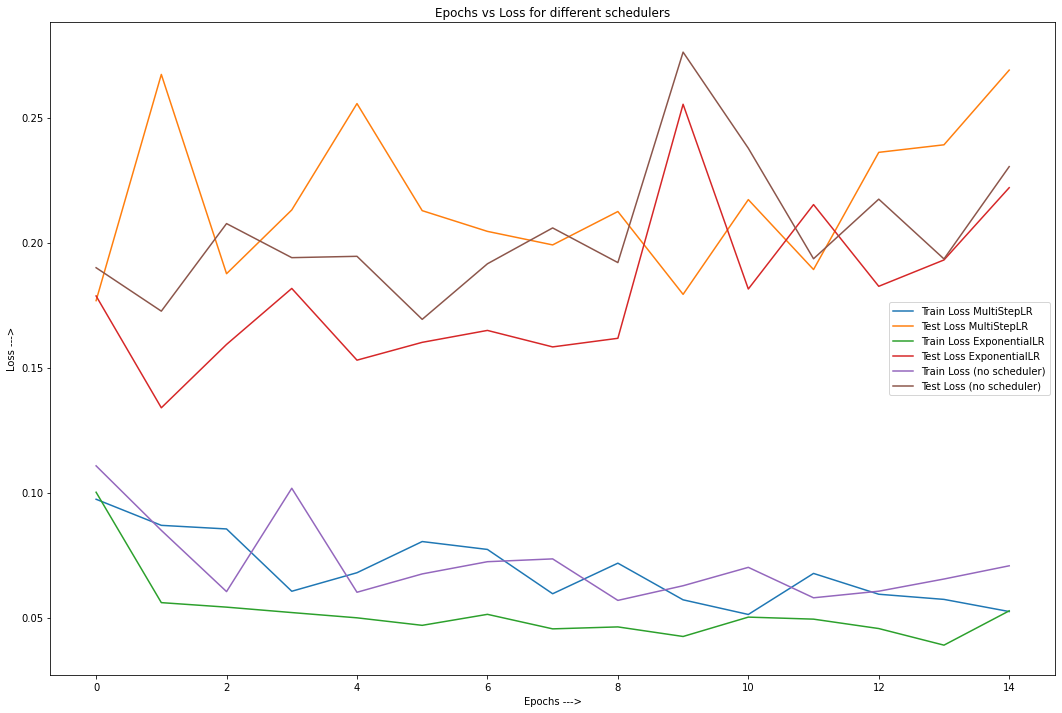

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Loss for different schedulers")
plt.plot(train_losses_list_MultiStepLR, label='Train Loss MultiStepLR')
plt.plot(test_losses_list_MultiStepLR, label='Test Loss MultiStepLR')
plt.plot(train_losses_list_ExponentialLR, label='Train Loss ExponentialLR')
plt.plot(test_losses_list_ExponentialLR, label='Test Loss ExponentialLR')
plt.plot(train_losses_list_no_Scheduler, label='Train Loss (no scheduler)')
plt.plot(test_losses_list_no_Scheduler, label='Test Loss (no scheduler)')
plt.xlabel("Epochs --->")
plt.ylabel("Loss --->")
plt.legend()
plt.show()

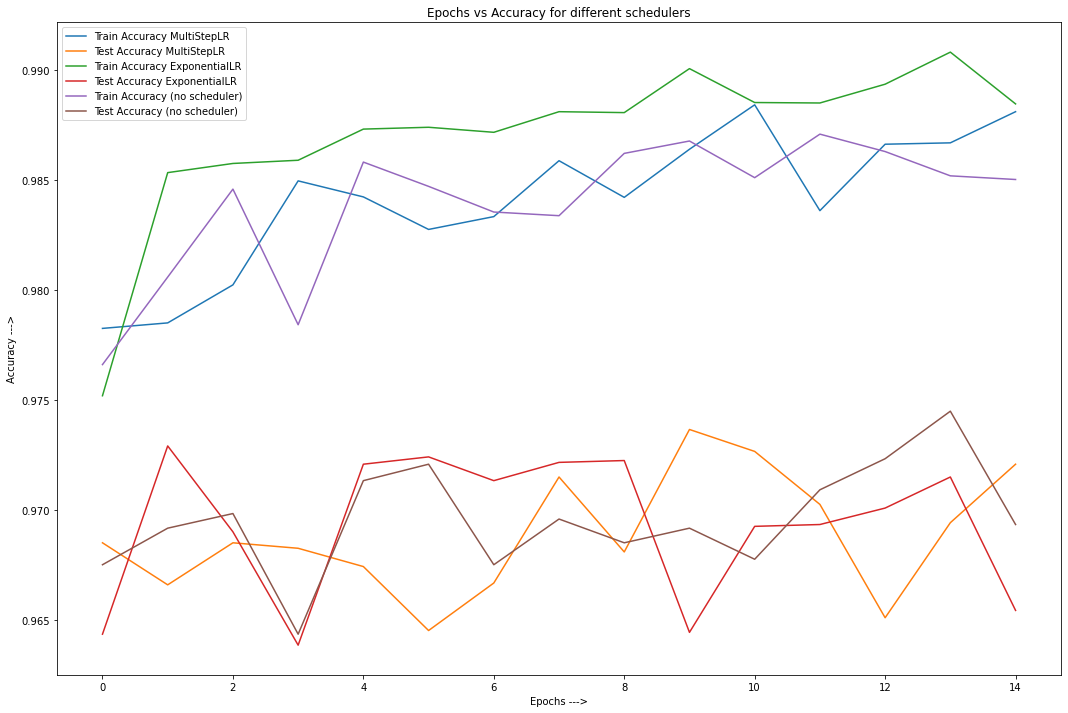

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Accuracy for different schedulers")
plt.plot(train_accuracy_list_MultiStepLR, label='Train Accuracy MultiStepLR')
plt.plot(test_accuracy_list_MultiStepLR, label='Test Accuracy MultiStepLR')
plt.plot(train_accuracy_list_ExponentialLR, label='Train Accuracy ExponentialLR')
plt.plot(test_accuracy_list_ExponentialLR, label='Test Accuracy ExponentialLR')
plt.plot(train_accuracy_list_no_Scheduler, label='Train Accuracy (no scheduler)')
plt.plot(test_accuracy_list_no_Scheduler, label='Test Accuracy (no scheduler)')
plt.xlabel("Epochs --->")
plt.ylabel("Accuracy --->")
plt.legend()
plt.show()

**Observations**<br>
- Training Loss for `ExponentialLR` is the least.

- Tarining Loss for `No Scheduler` is 2nd lowest, but the test loss is highest in case of `No Scheduler`. This actually implies that we may not be at the global minima while using `No Scheduler`, or we may converge to optimal loss very late(after comparatively higher number of epochs).

- It is seen that both `ExponentialLR` and `MultistepLR` performs significantly better than `No Scheduler`.

- Among `ExponentialLR` and `MultistepLR`, `ExponentialLR` performs better. It has better test loss and test accuray than `MultistepLR`.

In [ ]:
# code and analysis here

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

***BatchNorm Model***

In [ ]:
# https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout
# So in summary, the order of using batch normalization and dropout is:
# -> CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC ->

import torch.nn.functional as F

class MLP_BatchNorm(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # self.input_fc = nn.Linear(input_dim, 250)
        self.input_fc = nn.Linear(input_dim, 250, bias=False) # we don't need bias if we use batch normalization
        self.batch_norm1 = nn.BatchNorm1d(250, momentum=0.1)

        # self.hidden_fc = nn.Linear(250, 100)
        self.hidden_fc = nn.Linear(250, 100, bias=False)
        self.batch_norm2 = nn.BatchNorm1d(100, momentum=0.1)
        
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):

        # x = [batch size, height, width]

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        # x = [batch size, height * width]

        h_1 = self.input_fc(x)

        h_1 = self.batch_norm1(h_1)

        h_1 = F.relu(h_1)

        # h_1 = [batch size, 250]

        h_2 = self.hidden_fc(h_1)

        h_2 = self.batch_norm2(h_2)
        
        h_2 = F.relu(h_2)

        # h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]

        return y_pred, h_2

***Dropout Model***

In [ ]:
# https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout
# So in summary, the order of using batch normalization and dropout is:
# -> CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC ->

import torch.nn.functional as F

class MLP_Dropout(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.input_fc = nn.Linear(input_dim, 250)

        self.hidden_fc = nn.Linear(250, 100)
        
        self.output_fc = nn.Linear(100, output_dim)

        self.droput = nn.Dropout(0.2)

    def forward(self, x):

        # x = [batch size, height, width]

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        # x = [batch size, height * width]

        h_1 = F.relu(self.input_fc(x))

        # h_1 = [batch size, 250]

        # h_1 = self.droput(h_1)

        h_2 = F.relu(self.hidden_fc(h_1))

        # h_2 = [batch size, 100]

        h_2 = self.droput(h_2)

        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]

        return y_pred, h_2

***BatchNorm + Dropout Model***

In [ ]:
# https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout
# So in summary, the order of using batch normalization and dropout is:
# -> CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC ->

import torch.nn.functional as F

class MLP_BatchNorm_Dropout(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # self.input_fc = nn.Linear(input_dim, 250)
        self.input_fc = nn.Linear(input_dim, 250, bias=False) # we don't need bias if we use batch normalization
        self.batch_norm1 = nn.BatchNorm1d(250)

        # self.hidden_fc = nn.Linear(250, 100)
        self.hidden_fc = nn.Linear(250, 100, bias=False)
        self.batch_norm2 = nn.BatchNorm1d(100)
        
        self.output_fc = nn.Linear(100, output_dim)

        self.droput = nn.Dropout(0.2)

    def forward(self, x):

        # x = [batch size, height, width]

        batch_size = x.shape[0]

        x = x.view(batch_size, -1)

        # x = [batch size, height * width]

        h_1 = self.input_fc(x)

        h_1 = self.batch_norm1(h_1)

        h_1 = F.relu(h_1)

        h_1 = self.droput(h_1)

        # h_1 = [batch size, 250]

        h_2 = self.hidden_fc(h_1)

        h_2 = self.batch_norm2(h_2)
        
        h_2 = F.relu(h_2)

        h_2 = self.droput(h_2)

        # h_2 = [batch size, 100]

        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]

        return y_pred, h_2

In [ ]:
# code here

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [ ]:
# code here

***Testing Batch Normalization***

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_BatchNorm = MLP_BatchNorm(INPUT_DIM, OUTPUT_DIM)
model_BatchNorm

MLP_BatchNorm(
  (input_fc): Linear(in_features=784, out_features=250, bias=False)
  (batch_norm1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=False)
  (batch_norm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

optimizer_adam_BatchNorm = optim.Adam(model_BatchNorm.parameters())
optimizer_adam_BatchNorm

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_BatchNorm has {count_parameters(model_BatchNorm):,} trainable parameters')

The model_BatchNorm has 222,710 trainable parameters


In [ ]:
model_BatchNorm = model_BatchNorm.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_BatchNorm, train_accuracy_list_BatchNorm, test_losses_list_BatchNorm, test_accuracy_list_BatchNorm = train_and_validate_for_scheduler(model_BatchNorm, optimizer_adam_BatchNorm)


MLP_BatchNorm(
  (input_fc): Linear(in_features=784, out_features=250, bias=False)
  (batch_norm1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=False)
  (batch_norm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.232 | Train Acc: 93.83%
	 Val. Loss: 0.109 |  Val. Acc: 96.60%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 16s
	Train Loss: 0.092 | Train Acc: 97.22%
	 Val. Loss: 0.085 |  Val. Acc: 97.38%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.066 | Train Acc: 98.01%
	 Val. Loss: 0.077 |  Val. Acc: 97.59%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.049 | Train Acc: 98.39%
	 Val. Loss: 0.068 |  Val. Acc: 97.91%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.77%
	 Val. Loss: 0.071 |  Val. Acc: 97.79%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 16s
	Train Loss: 0.032 | Train Acc: 99.01%
	 Val. Loss: 0.077 |  Val. Acc: 97.78%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 16s
	Train Loss: 0.027 | Train Acc: 99.11%
	 Val. Loss: 0.070 |  Val. Acc: 97.97%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.024 | Train Acc: 99.21%
	 Val. Loss: 0.072 |  Val. Acc: 97.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.021 | Train Acc: 99.28%
	 Val. Loss: 0.075 |  Val. Acc: 97.92%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 16s
	Train Loss: 0.020 | Train Acc: 99.31%
	 Val. Loss: 0.078 |  Val. Acc: 97.78%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 17s
	Train Loss: 0.018 | Train Acc: 99.44%
	 Val. Loss: 0.077 |  Val. Acc: 98.11%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.018 | Train Acc: 99.37%
	 Val. Loss: 0.070 |  Val. Acc: 98.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.014 | Train Acc: 99.51%
	 Val. Loss: 0.072 |  Val. Acc: 98.20%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 16s
	Train Loss: 0.013 | Train Acc: 99.56%
	 Val. Loss: 0.074 |  Val. Acc: 98.10%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.012 | Train Acc: 99.60%
	 Val. Loss: 0.079 |  Val. Acc: 98.11%
Mean Train Loss: 0.045 | Mean Train Acc: 98.64%
Mean Val. Loss: 0.077 |  Mean Val. Acc: 97.81%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.066 | Test Acc: 97.84%
Precision: 0.978
Recall: 0.978
Accuracy: 0.978
F1 Score: 0.978


***Testing Dropout***

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_Dropout = MLP_Dropout(INPUT_DIM, OUTPUT_DIM)
model_Dropout

MLP_Dropout(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)

In [ ]:
import torch.optim as optim

optimizer_adam_Dropout = optim.Adam(model_Dropout.parameters())
optimizer_adam_Dropout

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_Dropout has {count_parameters(model_Dropout):,} trainable parameters')

The model_Dropout has 222,360 trainable parameters


In [ ]:
model_Dropout = model_Dropout.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_Dropout, train_accuracy_list_Dropout, test_losses_list_Dropout, test_accuracy_list_Dropout = train_and_validate_for_scheduler(model_Dropout, optimizer_adam_Dropout)


MLP_Dropout(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.348 | Train Acc: 89.95%
	 Val. Loss: 0.177 |  Val. Acc: 94.60%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.135 | Train Acc: 95.95%
	 Val. Loss: 0.118 |  Val. Acc: 96.46%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.092 | Train Acc: 97.19%
	 Val. Loss: 0.091 |  Val. Acc: 97.20%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.065 | Train Acc: 97.95%
	 Val. Loss: 0.086 |  Val. Acc: 97.41%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.050 | Train Acc: 98.46%
	 Val. Loss: 0.079 |  Val. Acc: 97.69%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.74%
	 Val. Loss: 0.079 |  Val. Acc: 97.75%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 16s
	Train Loss: 0.033 | Train Acc: 98.89%
	 Val. Loss: 0.078 |  Val. Acc: 97.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 16s
	Train Loss: 0.027 | Train Acc: 99.12%
	 Val. Loss: 0.075 |  Val. Acc: 98.07%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.021 | Train Acc: 99.33%
	 Val. Loss: 0.087 |  Val. Acc: 97.93%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 17s
	Train Loss: 0.021 | Train Acc: 99.33%
	 Val. Loss: 0.078 |  Val. Acc: 97.99%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 17s
	Train Loss: 0.016 | Train Acc: 99.49%
	 Val. Loss: 0.093 |  Val. Acc: 97.77%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.016 | Train Acc: 99.51%
	 Val. Loss: 0.095 |  Val. Acc: 97.76%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.014 | Train Acc: 99.50%
	 Val. Loss: 0.088 |  Val. Acc: 98.02%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 17s
	Train Loss: 0.014 | Train Acc: 99.56%
	 Val. Loss: 0.102 |  Val. Acc: 97.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.015 | Train Acc: 99.47%
	 Val. Loss: 0.088 |  Val. Acc: 98.03%
Mean Train Loss: 0.060 | Mean Train Acc: 98.16%
Mean Val. Loss: 0.094 |  Mean Val. Acc: 97.49%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.071 | Test Acc: 97.96%
Precision: 0.980
Recall: 0.980
Accuracy: 0.980
F1 Score: 0.979


***Testing BatchNormalization and Dropout***

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_BatchNorm_Dropout = MLP_BatchNorm_Dropout(INPUT_DIM, OUTPUT_DIM)
model_BatchNorm_Dropout

MLP_BatchNorm_Dropout(
  (input_fc): Linear(in_features=784, out_features=250, bias=False)
  (batch_norm1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=False)
  (batch_norm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)

In [ ]:
import torch.optim as optim

optimizer_adam_BatchNorm_Dropout = optim.Adam(model_BatchNorm_Dropout.parameters())
optimizer_adam_BatchNorm_Dropout

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_BatchNorm_Dropout has {count_parameters(model_BatchNorm_Dropout):,} trainable parameters')

The model_BatchNorm_Dropout has 222,710 trainable parameters


In [ ]:
model_BatchNorm_Dropout = model_BatchNorm_Dropout.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_BatchNorm_Dropout, train_accuracy_list_BatchNorm_Dropout, test_losses_list_BatchNorm_Dropout, test_accuracy_list_BatchNorm_Dropout = train_and_validate_for_scheduler(model_BatchNorm_Dropout, optimizer_adam_BatchNorm_Dropout)


MLP_BatchNorm_Dropout(
  (input_fc): Linear(in_features=784, out_features=250, bias=False)
  (batch_norm1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=False)
  (batch_norm2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.309 | Train Acc: 91.64%
	 Val. Loss: 0.113 |  Val. Acc: 96.58%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.138 | Train Acc: 95.75%
	 Val. Loss: 0.087 |  Val. Acc: 97.44%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.106 | Train Acc: 96.69%
	 Val. Loss: 0.085 |  Val. Acc: 97.36%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 0.091 | Train Acc: 97.15%
	 Val. Loss: 0.073 |  Val. Acc: 97.70%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.080 | Train Acc: 97.42%
	 Val. Loss: 0.071 |  Val. Acc: 97.86%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.069 | Train Acc: 97.78%
	 Val. Loss: 0.068 |  Val. Acc: 97.95%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 16s
	Train Loss: 0.062 | Train Acc: 98.02%
	 Val. Loss: 0.069 |  Val. Acc: 97.84%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 17s
	Train Loss: 0.056 | Train Acc: 98.22%
	 Val. Loss: 0.067 |  Val. Acc: 98.00%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.053 | Train Acc: 98.23%
	 Val. Loss: 0.062 |  Val. Acc: 98.11%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 16s
	Train Loss: 0.050 | Train Acc: 98.36%
	 Val. Loss: 0.068 |  Val. Acc: 97.95%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 17s
	Train Loss: 0.046 | Train Acc: 98.51%
	 Val. Loss: 0.061 |  Val. Acc: 98.11%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.040 | Train Acc: 98.65%
	 Val. Loss: 0.061 |  Val. Acc: 98.20%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 17s
	Train Loss: 0.039 | Train Acc: 98.71%
	 Val. Loss: 0.064 |  Val. Acc: 98.15%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 16s
	Train Loss: 0.040 | Train Acc: 98.59%
	 Val. Loss: 0.069 |  Val. Acc: 98.10%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.035 | Train Acc: 98.87%
	 Val. Loss: 0.068 |  Val. Acc: 98.06%
Mean Train Loss: 0.081 | Mean Train Acc: 97.50%
Mean Val. Loss: 0.072 |  Mean Val. Acc: 97.82%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.056 | Test Acc: 98.40%
Precision: 0.984
Recall: 0.984
Accuracy: 0.984
F1 Score: 0.984


***Testing Normal Model***

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_simple = MLP(INPUT_DIM, OUTPUT_DIM)
model_simple

MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

optimizer_adam_simple = optim.Adam(model_simple.parameters())
optimizer_adam_simple

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_simple has {count_parameters(model_simple):,} trainable parameters')

The model_simple has 222,360 trainable parameters


In [ ]:
model_simple = model_simple.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_simple, train_accuracy_list_simple, test_losses_list_simple, test_accuracy_list_simple = train_and_validate_for_scheduler(model_simple, optimizer_adam_simple)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/15 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.326 | Train Acc: 90.56%
	 Val. Loss: 0.173 |  Val. Acc: 95.05%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.129 | Train Acc: 96.05%
	 Val. Loss: 0.110 |  Val. Acc: 96.83%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.084 | Train Acc: 97.45%
	 Val. Loss: 0.091 |  Val. Acc: 97.18%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.061 | Train Acc: 98.04%
	 Val. Loss: 0.085 |  Val. Acc: 97.44%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.044 | Train Acc: 98.58%
	 Val. Loss: 0.085 |  Val. Acc: 97.56%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.036 | Train Acc: 98.82%
	 Val. Loss: 0.091 |  Val. Acc: 97.27%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 17s
	Train Loss: 0.029 | Train Acc: 99.11%
	 Val. Loss: 0.087 |  Val. Acc: 97.58%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 16s
	Train Loss: 0.022 | Train Acc: 99.28%
	 Val. Loss: 0.095 |  Val. Acc: 97.42%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 17s
	Train Loss: 0.019 | Train Acc: 99.40%
	 Val. Loss: 0.095 |  Val. Acc: 97.63%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 16s
	Train Loss: 0.017 | Train Acc: 99.42%
	 Val. Loss: 0.099 |  Val. Acc: 97.57%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 0m 16s
	Train Loss: 0.017 | Train Acc: 99.42%
	 Val. Loss: 0.095 |  Val. Acc: 97.85%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 0m 18s
	Train Loss: 0.012 | Train Acc: 99.58%
	 Val. Loss: 0.113 |  Val. Acc: 97.45%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 0m 16s
	Train Loss: 0.013 | Train Acc: 99.58%
	 Val. Loss: 0.125 |  Val. Acc: 97.17%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 0m 17s
	Train Loss: 0.013 | Train Acc: 99.59%
	 Val. Loss: 0.102 |  Val. Acc: 97.81%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 0m 18s
	Train Loss: 0.006 | Train Acc: 99.83%
	 Val. Loss: 0.111 |  Val. Acc: 97.83%
Mean Train Loss: 0.055 | Mean Train Acc: 98.31%
Mean Val. Loss: 0.104 |  Mean Val. Acc: 97.31%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.076 | Test Acc: 97.73%
Precision: 0.977
Recall: 0.977
Accuracy: 0.977
F1 Score: 0.977


In [ ]:
print(train_losses_list_simple)
print(test_losses_list_simple)
print(train_losses_list_BatchNorm)
print(test_losses_list_BatchNorm)
print(train_losses_list_Dropout)
print(test_losses_list_Dropout)
print(train_losses_list_BatchNorm_Dropout)
print(test_losses_list_BatchNorm_Dropout)


[0.32598740302522977, 0.12874870615204176, 0.08358528272124628, 0.061426932239594556, 0.04392130437276016, 0.03609511877798165, 0.029216181178266805, 0.02187858112672499, 0.018905189390391267, 0.01672118914059441, 0.01658679544351374, 0.012270126315144202, 0.012970521741107707, 0.012519873735305737, 0.005831558934194618]
[0.1731477085045202, 0.1098007108827934, 0.09066616891179868, 0.08512235707553857, 0.0849546173505703, 0.0906012190674293, 0.08728141719326774, 0.09541331088180317, 0.0945526115827577, 0.09917034053711525, 0.09500748638551003, 0.11261161137422568, 0.12467364246263156, 0.10215903590982092, 0.11050935513834546]
[0.2323235726604859, 0.0916393855077525, 0.06576714440621435, 0.04872507458149145, 0.03912762183463201, 0.0317926645722473, 0.026957823500347634, 0.023848551257125414, 0.021497136877616868, 0.01982355646841461, 0.017881932388059796, 0.018382069181650876, 0.014106276051703996, 0.013311251537170998, 0.012173119414849982]
[0.10915988165528533, 0.08497285855280116, 0.

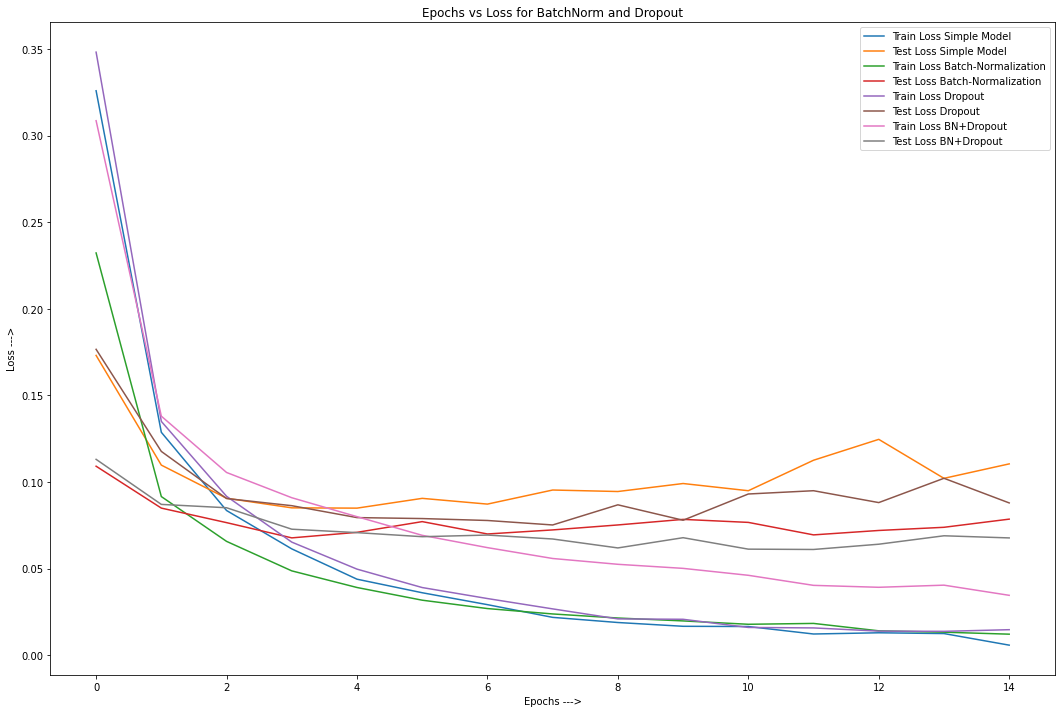

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Loss for BatchNorm and Dropout")

plt.plot(train_losses_list_simple, label='Train Loss Simple Model')
plt.plot(test_losses_list_simple, label='Test Loss Simple Model')
plt.plot(train_losses_list_BatchNorm, label='Train Loss Batch-Normalization')
plt.plot(test_losses_list_BatchNorm, label='Test Loss Batch-Normalization')
plt.plot(train_losses_list_Dropout, label='Train Loss Dropout')
plt.plot(test_losses_list_Dropout, label='Test Loss Dropout')
plt.plot(train_losses_list_BatchNorm_Dropout, label='Train Loss BN+Dropout')
plt.plot(test_losses_list_BatchNorm_Dropout, label='Test Loss BN+Dropout')
plt.xlabel("Epochs --->")
plt.ylabel("Loss --->")
plt.legend()
plt.show()

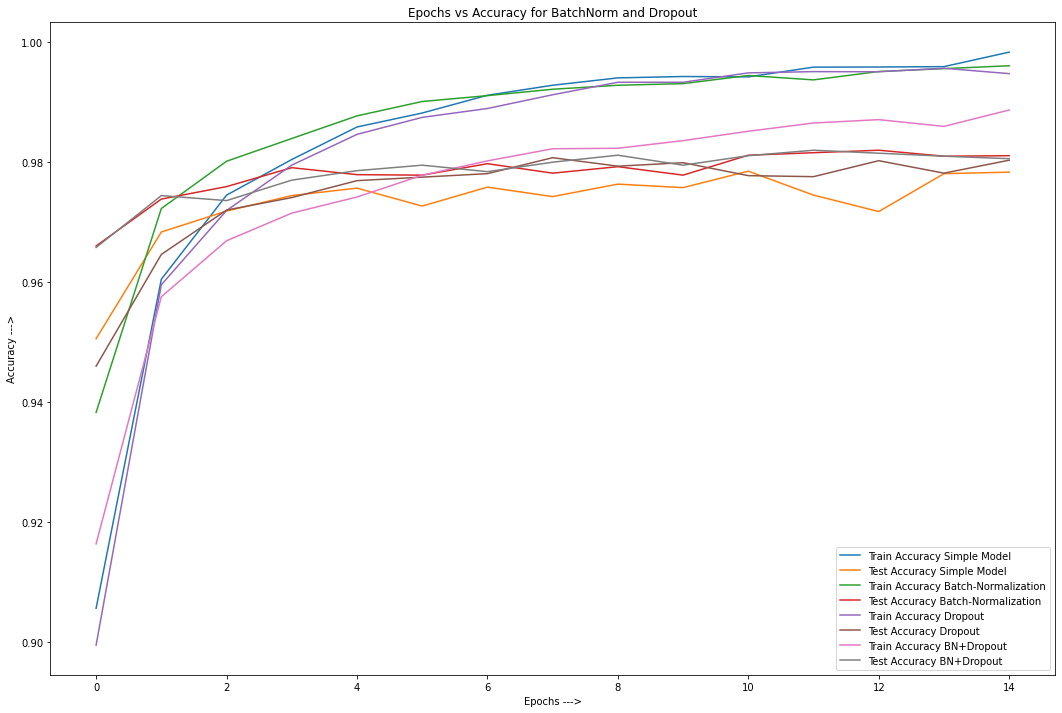

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Accuracy for BatchNorm and Dropout")

plt.plot(train_accuracy_list_simple, label='Train Accuracy Simple Model')
plt.plot(test_accuracy_list_simple, label='Test Accuracy Simple Model')
plt.plot(train_accuracy_list_BatchNorm, label='Train Accuracy Batch-Normalization')
plt.plot(test_accuracy_list_BatchNorm, label='Test Accuracy Batch-Normalization')
plt.plot(train_accuracy_list_Dropout, label='Train Accuracy Dropout')
plt.plot(test_accuracy_list_Dropout, label='Test Accuracy Dropout')
plt.plot(train_accuracy_list_BatchNorm_Dropout, label='Train Accuracy BN+Dropout')
plt.plot(test_accuracy_list_BatchNorm_Dropout, label='Test Accuracy BN+Dropout')
plt.xlabel("Epochs --->")
plt.ylabel("Accuracy --->")
plt.legend()
plt.show()

**Observations**<br>
- In case of simple model, training loss is quite low, but the test loss varies very frequently and is higher than all 3 other techniques. It implies that the simple model is showing signs of overfitting.
- The 3 other models(BatchNorm, Dropout, BatchNorm+Dropout) are working fine.
- All the three techniques are having allmost equivalent results in this dataset.
- The most stable and promising result is given by the (BatchNorm+Dropout) technique.

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

https://stackoverflow.com/questions/63139072/batch-size-for-stochastic-gradient-descent-is-length-of-training-data-and-not-1#:~:text=batch_size%20%3D%201%20means%20indeed%20stochastic,as%20mini%2Dbatch%20gradient%20descent
- Batch_size = 1 means indeed stochastic gradient descent (SGD)
- A batch_size equal to the whole of the training data is (batch) gradient descent (GD)
- Intermediate cases (which are actually used in practice) are usually referred to as mini-batch gradient descent

In [ ]:
def train_and_validate_for_batch(model, optimizer, train_iterator, valid_iterator, test_iterator):
    train_losses_list = []
    train_accuracy_list = []
    test_losses_list = []
    test_accuracy_list = []
    test_f1_scores_list = []
    test_precision_list = []
    test_recall_list = []
    test_accuracy_list = []

    import time
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

    EPOCHS = 5

    best_valid_loss = float('inf')

    tot_train_loss = 0.0
    tot_train_acc = 0.0
    tot_valid_loss = 0.0
    tot_valid_acc = 0.0

    train_loss_epocwise = []
    train_accuracy_epocwise = []
    test_loss_epocwise = []
    test_accuracy_epocwise = []

    print("======================================================================================")
    print(model)

    for epoch in trange(EPOCHS):

        start_time = time.monotonic()

        train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

        train_loss_epocwise.append(train_loss)
        train_accuracy_epocwise.append(train_acc)
        test_loss_epocwise.append(valid_loss)
        test_accuracy_epocwise.append(valid_acc)

        tot_train_loss += train_loss
        tot_train_acc += train_acc
        tot_valid_loss += valid_loss
        tot_valid_acc += valid_acc

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), "model_scheduler.pt")

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    mean_train_loss = tot_train_loss/EPOCHS
    mean_train_acc = tot_train_acc/EPOCHS
    mean_valid_loss = tot_valid_loss/EPOCHS
    mean_valid_acc = tot_valid_acc/EPOCHS
    print(f'Mean Train Loss: {mean_train_loss:.3f} | Mean Train Acc: {mean_train_acc*100:.2f}%')
    print(f'Mean Val. Loss: {mean_valid_loss:.3f} |  Mean Val. Acc: {mean_valid_acc*100:.2f}%')

    model.load_state_dict(torch.load("model_scheduler.pt"))
    test_loss, test_acc = evaluate(model, test_iterator, criterion, device)
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

    images, labels, probs = get_predictions(model, test_iterator, device)
    pred_labels = torch.argmax(probs, 1)

    print('Precision: %.3f' % precision_score(labels, pred_labels, average='weighted'))
    print('Recall: %.3f' % recall_score(labels, pred_labels, average='weighted'))
    print('Accuracy: %.3f' % accuracy_score(labels, pred_labels))
    print('F1 Score: %.3f' % f1_score(labels, pred_labels, average='weighted'))
    
    test_f1_scores_list.append(f1_score(labels, pred_labels, average='weighted'))
    test_precision_list.append(precision_score(labels, pred_labels, average='weighted'))
    test_recall_list.append(recall_score(labels, pred_labels, average='weighted'))
    test_accuracy_list.append(accuracy_score(labels, pred_labels))
    # plot_confusion_matrix(labels, pred_labels)
    print("======================================================================================")
    return train_loss_epocwise, train_accuracy_epocwise, test_loss_epocwise, test_accuracy_epocwise


***Mini Batch***

In [ ]:
BATCH_SIZE = 64

train_iterator_mini_batch = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

valid_iterator_mini_batch = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

test_iterator_mini_batch = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE,
                                num_workers=2)

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_simple = MLP(INPUT_DIM, OUTPUT_DIM)
model_simple

MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

optimizer_adam_simple = optim.Adam(model_simple.parameters())
optimizer_adam_simple

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_simple has {count_parameters(model_simple):,} trainable parameters')

The model_simple has 222,360 trainable parameters


In [ ]:
model_simple = model_simple.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_mini_batch, train_accuracy_list_mini_batch, test_losses_list_mini_batch, test_accuracy_list_mini_batch = train_and_validate_for_batch(model_simple, optimizer_adam_simple, train_iterator_mini_batch, valid_iterator_mini_batch, test_iterator_mini_batch)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 0.321 | Train Acc: 90.81%
	 Val. Loss: 0.155 |  Val. Acc: 95.50%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.128 | Train Acc: 96.13%
	 Val. Loss: 0.110 |  Val. Acc: 96.55%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.083 | Train Acc: 97.44%
	 Val. Loss: 0.098 |  Val. Acc: 97.06%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 0.061 | Train Acc: 98.07%
	 Val. Loss: 0.092 |  Val. Acc: 97.11%


Training:   0%|          | 0/750 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/188 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.044 | Train Acc: 98.57%
	 Val. Loss: 0.111 |  Val. Acc: 96.68%
Mean Train Loss: 0.127 | Mean Train Acc: 96.20%
Mean Val. Loss: 0.113 |  Mean Val. Acc: 96.58%


Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.087 | Test Acc: 97.42%
Precision: 0.974
Recall: 0.974
Accuracy: 0.974
F1 Score: 0.974


***Stochastic***

In [ ]:
BATCH_SIZE = 1

train_iterator_stochastic = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

valid_iterator_stochastic = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE,
                                 num_workers=2)

test_iterator_stochastic = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE,
                                num_workers=2)

In [ ]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

model_simple = MLP(INPUT_DIM, OUTPUT_DIM)
model_simple

MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

optimizer_adam_simple = optim.Adam(model_simple.parameters())
optimizer_adam_simple

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
print(f'The model_simple has {count_parameters(model_simple):,} trainable parameters')

The model_simple has 222,360 trainable parameters


In [ ]:
model_simple = model_simple.to(device)
criterion = criterion.to(device)

In [ ]:
train_losses_list_stochastic, train_accuracy_list_stochastic, test_losses_list_stochastic, test_accuracy_list_stochastic = train_and_validate_for_batch(model_simple, optimizer_adam_simple, train_iterator_stochastic, valid_iterator_stochastic, test_iterator_stochastic)


MLP(
  (input_fc): Linear(in_features=784, out_features=250, bias=True)
  (hidden_fc): Linear(in_features=250, out_features=100, bias=True)
  (output_fc): Linear(in_features=100, out_features=10, bias=True)
)


  0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/48000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12000 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 8m 56s
	Train Loss: 0.249 | Train Acc: 92.76%
	 Val. Loss: 0.161 |  Val. Acc: 95.55%


Training:   0%|          | 0/48000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12000 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 10m 38s
	Train Loss: 0.157 | Train Acc: 95.94%
	 Val. Loss: 0.191 |  Val. Acc: 95.25%


Training:   0%|          | 0/48000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12000 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 11m 55s
	Train Loss: 0.144 | Train Acc: 96.62%
	 Val. Loss: 0.170 |  Val. Acc: 96.12%


Training:   0%|          | 0/48000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12000 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 12m 23s
	Train Loss: 0.137 | Train Acc: 96.93%
	 Val. Loss: 0.247 |  Val. Acc: 95.11%


Training:   0%|          | 0/48000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/12000 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 12m 47s
	Train Loss: 0.125 | Train Acc: 97.26%
	 Val. Loss: 0.245 |  Val. Acc: 96.25%
Mean Train Loss: 0.163 | Mean Train Acc: 95.90%
Mean Val. Loss: 0.203 |  Mean Val. Acc: 95.66%


Evaluating:   0%|          | 0/10000 [00:00<?, ?it/s]

Test Loss: 0.152 | Test Acc: 96.03%
Precision: 0.961
Recall: 0.960
Accuracy: 0.960
F1 Score: 0.960


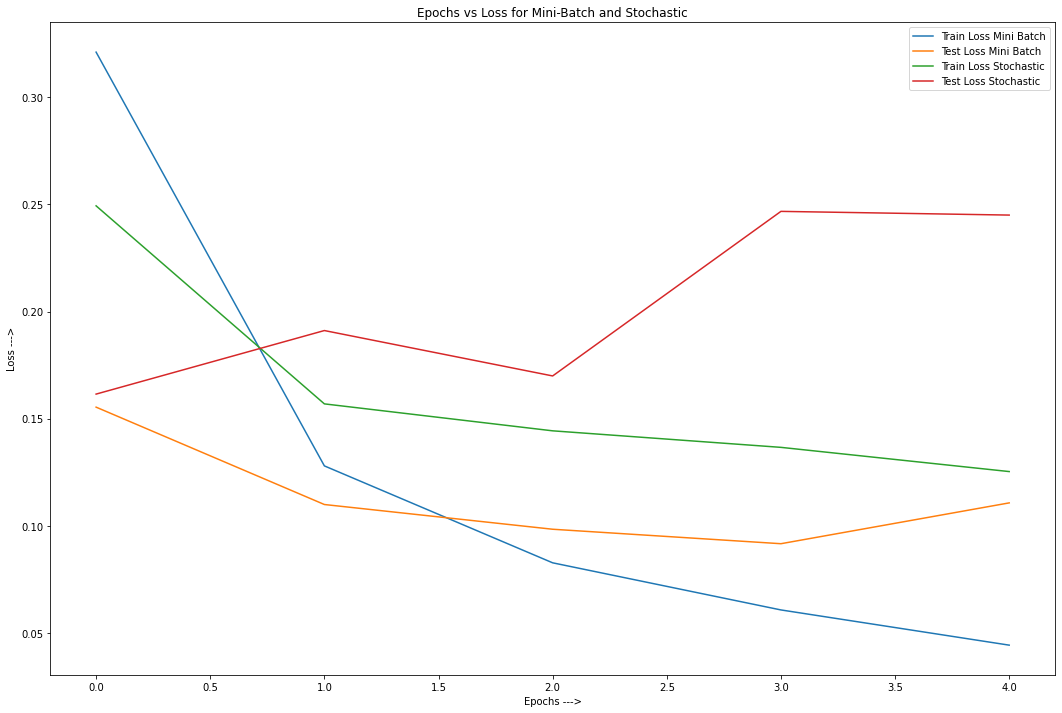

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Loss for Mini-Batch and Stochastic")

plt.plot(train_losses_list_mini_batch, label='Train Loss Mini Batch')
plt.plot(test_losses_list_mini_batch, label='Test Loss Mini Batch')
plt.plot(train_losses_list_stochastic, label='Train Loss Stochastic')
plt.plot(test_losses_list_stochastic, label='Test Loss Stochastic')
plt.xlabel("Epochs --->")
plt.ylabel("Loss --->")
plt.legend()
plt.show()

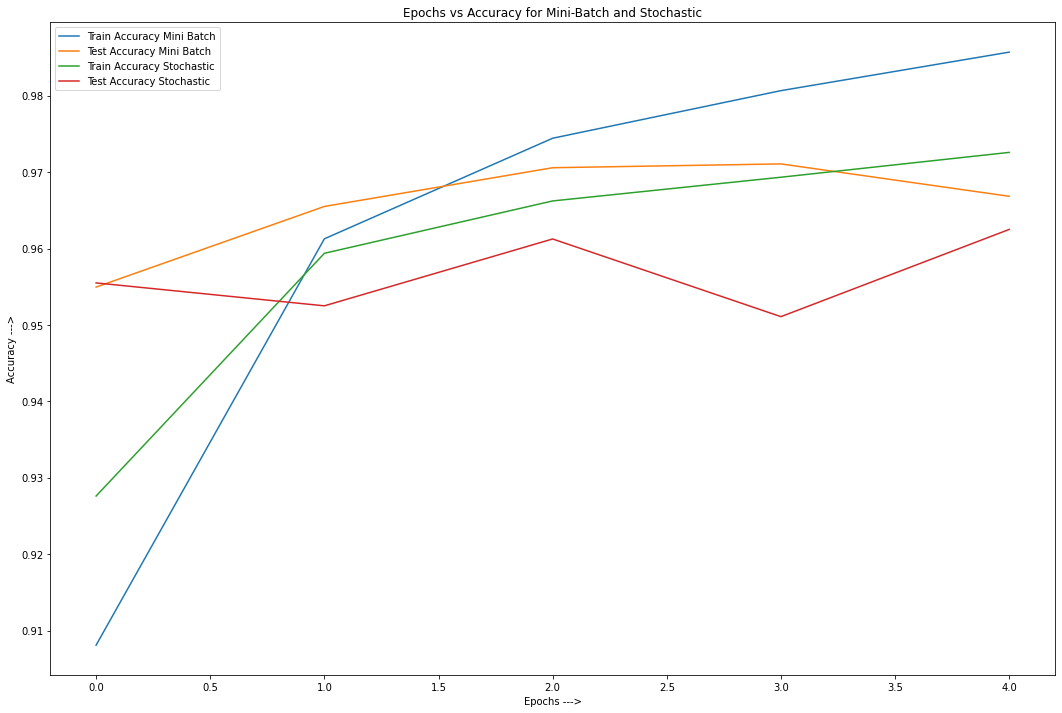

In [ ]:
plt.figure(figsize=(18, 12))
plt.title("Epochs vs Accuracy for Mini-Batch and Stochastic")

plt.plot(train_accuracy_list_mini_batch, label='Train Accuracy Mini Batch')
plt.plot(test_accuracy_list_mini_batch, label='Test Accuracy Mini Batch')
plt.plot(train_accuracy_list_stochastic, label='Train Accuracy Stochastic')
plt.plot(test_accuracy_list_stochastic, label='Test Accuracy Stochastic')
plt.xlabel("Epochs --->")
plt.ylabel("Accuracy --->")
plt.legend()
plt.show()

**Observations**<br>
- `Stochastic` approach trains on 1 random example at a time i.e. batch-size=1 here. So, it takes every single training example into consideration and hence maybe prone to outliers.

- So, `Stochastic` approach is useful to find global minima.

- `Stochastic Model` is quite slow in comparison to `Mini-Batch`. This is because, in case of `Mini-Batch` we were taking batch-size=64 whereas in case of `Stochastic`, we are taking batch-size=1

- In both `Stochastic Model` and `Mini-Batch`, the metrices like training and testing accuracy, training and testing loss, f1 score are almost identical. So, we can come to a conclusion that the combination of optimizer, model architechture are working pretty well and there are very rare chances of overfitting or underfitting.

- Since `Stochastic Model` and `Mini-Batch` both are giving almost equivalent results, we are ok with mini-batch approach only since `Stochastic` apprach is taking a lot of time in comparison to `Mini-Batch` approach.

- Also, all over we are getting best test accuracy of 98.01 with `SGD with L2 regularization`. We can get even more accuracy if we increase number of epochs and hypertune the parameters of optimizer well.

- As the number of epochs increase, the results of `Mini-Batch` and `Stochastic` start becoming more and more closer to each other.

- Overall, in case of `Mini-Batch`, the accuracy is more than `Stochastic`.

In [ ]:
# code here

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

**Observations**<br>
- As the `simple MLP` model is working fine in almost all the cases for this dataset, I was in doubt about the need of Batch-Normalization, Dropout and combination of both. But, when I applied them, the results were promising. We could see lower loss and higher accuracy(even though by a small margin). I believe when the dataset is larger and the network is more complex, these techniques would become very handy to achieve `greater accuracy`, `avoid overfitting`, `gain stability` etc.

- `Stochastic Model` is quite slow in comparison to Mini-Batch. This is because, in case of Mini-Batch we were taking batch-size=64 whereas in case of Stochastic, we are taking batch-size=1.

- I thought that stochastic would be more accurate than mini-batch. But here in this dataset, in case of Mini-Batch, the accuracy is more than Stochastic.

- I learnt about different optimizers and their importance. 

- SGD takes highest time to converge and hence requires more epochs to converge gradually.

- But, if we add momentum with SGD or L2 regularization with SGD then it performs very well for this dataset.

- SGD with L2 regularization performs very accurate with test dataset since it penalizes large weights and prevents overfitting.

- The best test accuracy is given by SGD with L2 regularization

- I learnt about different schedulers and their importance. 

- It is seen that both `ExponentialLR` and `MultistepLR` performs significantly better than `No Scheduler`.

- Among `ExponentialLR` and `MultistepLR`, `ExponentialLR` performs better. It has better test loss and test accuray than `MultistepLR`.

- But, when I plotted the graph for loss and accuracy for different schedulers, I found that `MultistepLR` is fluctuating too much where as `ExponentialLR` is pretty stable.

- `MultistepLR` actually makes large jumps in laerning rate at certain milestones during training phase. That's why we found so many zig-zag pattern in the graph. Hence, the loss and accuracy fluctuates in case of `MultistepLR` in comparison to `ExponentialLR`.
